In [1]:
import pandas as pd

# Load the dataset
file_path = "full_data.csv"
df = pd.read_csv(file_path)

# Display initial dataset information
print("Initial Dataset Information:")
print(df.info())

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None


In [2]:
# Check for null values in each column
print("Missing Values in the Dataset:")
print(df.isnull().sum())

# Display the percentage of missing values
print("\nPercentage of Missing Values:")
print((df.isnull().sum() / len(df)) * 100)

Missing Values in the Dataset:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Missing Values:
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64


In [3]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

print(f"Total Duplicate Rows: {num_duplicates}")

# Display the duplicate rows (if any)
if num_duplicates > 0:
    print("\nDuplicate Rows:")
    print(df[duplicate_rows])
else:
    print("\nNo duplicate rows found.")

Total Duplicate Rows: 0

No duplicate rows found.


In [4]:
df = pd.get_dummies(df, drop_first=True)

Matplotlib is building the font cache; this may take a moment.


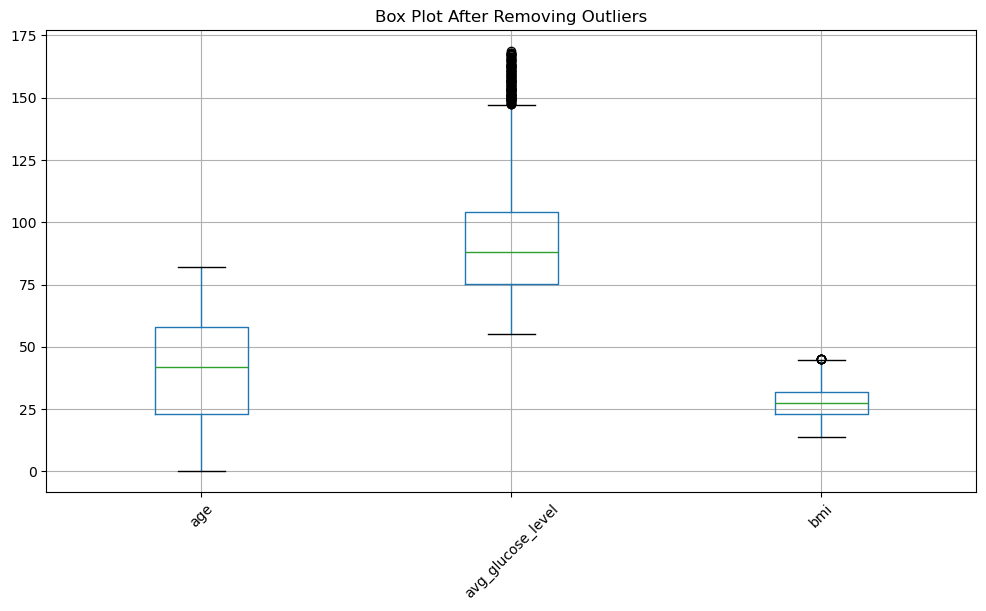

In [5]:
import matplotlib.pyplot as plt

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for numerical features
numerical_columns = ["age", "avg_glucose_level", "bmi"]
for col in numerical_columns:
    df = remove_outliers_iqr(df, col)

# Visualize outliers using Box Plot
plt.figure(figsize=(12, 6))
df[numerical_columns].boxplot()
plt.title("Box Plot After Removing Outliers")
plt.xticks(rotation=45)
plt.show()

In [6]:
import sys
print(sys.executable)


c:\Users\HP\anaconda3\envs\myenv\python.exe


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["age", "avg_glucose_level", "bmi"]] = scaler.fit_transform(df[["age", "avg_glucose_level", "bmi"]])

print("Data normalized between 0 and 1.")


Data normalized between 0 and 1.


In [8]:
# Save cleaned dataset
cleaned_file_path = "cleaned_data.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved at: {cleaned_file_path}")


Cleaned data saved at: cleaned_data.csv


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
df = pd.read_csv("cleaned_data.csv")

In [10]:
# Split data into features and target
X = df.drop(columns=["stroke"])  # Features
y = df["stroke"]  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Standardize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
# Train Model with the Current Scikit-Learn Version
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
# Save the trained model and scaler
joblib.dump(model, "stroke_prediction_modell.pkl")
joblib.dump(scaler, "scalerr.pkl")

print("Model Retrained and Saved Successfully")

Model Retrained and Saved Successfully
